# Training log

Segmentation performance on the validation set through training

In [10]:
library(tidyverse)

In [11]:
theme_set(theme_light())

In [36]:
data <- read_csv("../model/dice_50_50.clean.csv") %>% mutate(epoch = row_number(), frozen=epoch<=50)

Rows: 100 Columns: 8

── Column specification ──────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): epoch, train_loss, valid_loss, acc_seg, diceComb, diceLV, diceMY
time (1): time


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [51]:
search_data <- read_csv("../model//dice_search.clean.csv") %>%
    mutate(
        frozen = row_number()<=50,
        epoch = row_number()+50
    )

Rows: 150 Columns: 8

── Column specification ──────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl  (7): epoch, train_loss, valid_loss, acc_seg, diceComb, diceLV, diceMY
time (1): time


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [53]:
log_for_final_model = bind_rows(head(data, 50), search_data) %>% mutate(used = ((frozen & epoch<=70) | (!frozen & epoch<=170)))

In [54]:
log_for_final_model %>% filter(epoch%%10==0)

epoch,train_loss,valid_loss,acc_seg,diceComb,diceLV,diceMY,time,frozen,used
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<time>,<lgl>,<lgl>
10,2.644718,2.906139,0.9960051,0.8630943,0.8526044,0.7850568,00:15:00,TRUE,TRUE
20,2.727280,3.071991,0.9960809,0.8421753,0.8444529,0.7680243,00:15:00,TRUE,TRUE
30,2.326001,2.822929,0.9962341,0.8800992,0.8398187,0.8082111,00:15:00,TRUE,TRUE
40,2.429334,2.809577,0.9962165,0.8835959,0.8372649,0.8078484,00:15:00,TRUE,TRUE
50,2.354466,3.262739,0.9961568,0.8371925,0.8272275,0.7610667,00:15:00,TRUE,TRUE
60,2.505717,2.821679,0.9961979,0.8660838,0.8498061,0.7937618,00:15:00,TRUE,TRUE
70,2.294199,2.471724,0.9965596,0.8916212,0.8683361,0.8194202,00:15:00,TRUE,TRUE
80,2.436615,2.858002,0.9962506,0.8595847,0.8518372,0.7868177,00:15:00,TRUE,FALSE
90,2.259748,2.751943,0.9962598,0.8815037,0.8473437,0.8045942,00:15:00,TRUE,FALSE


In [55]:
options(repr.plot.res = 200, repr.plot.width = 12)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



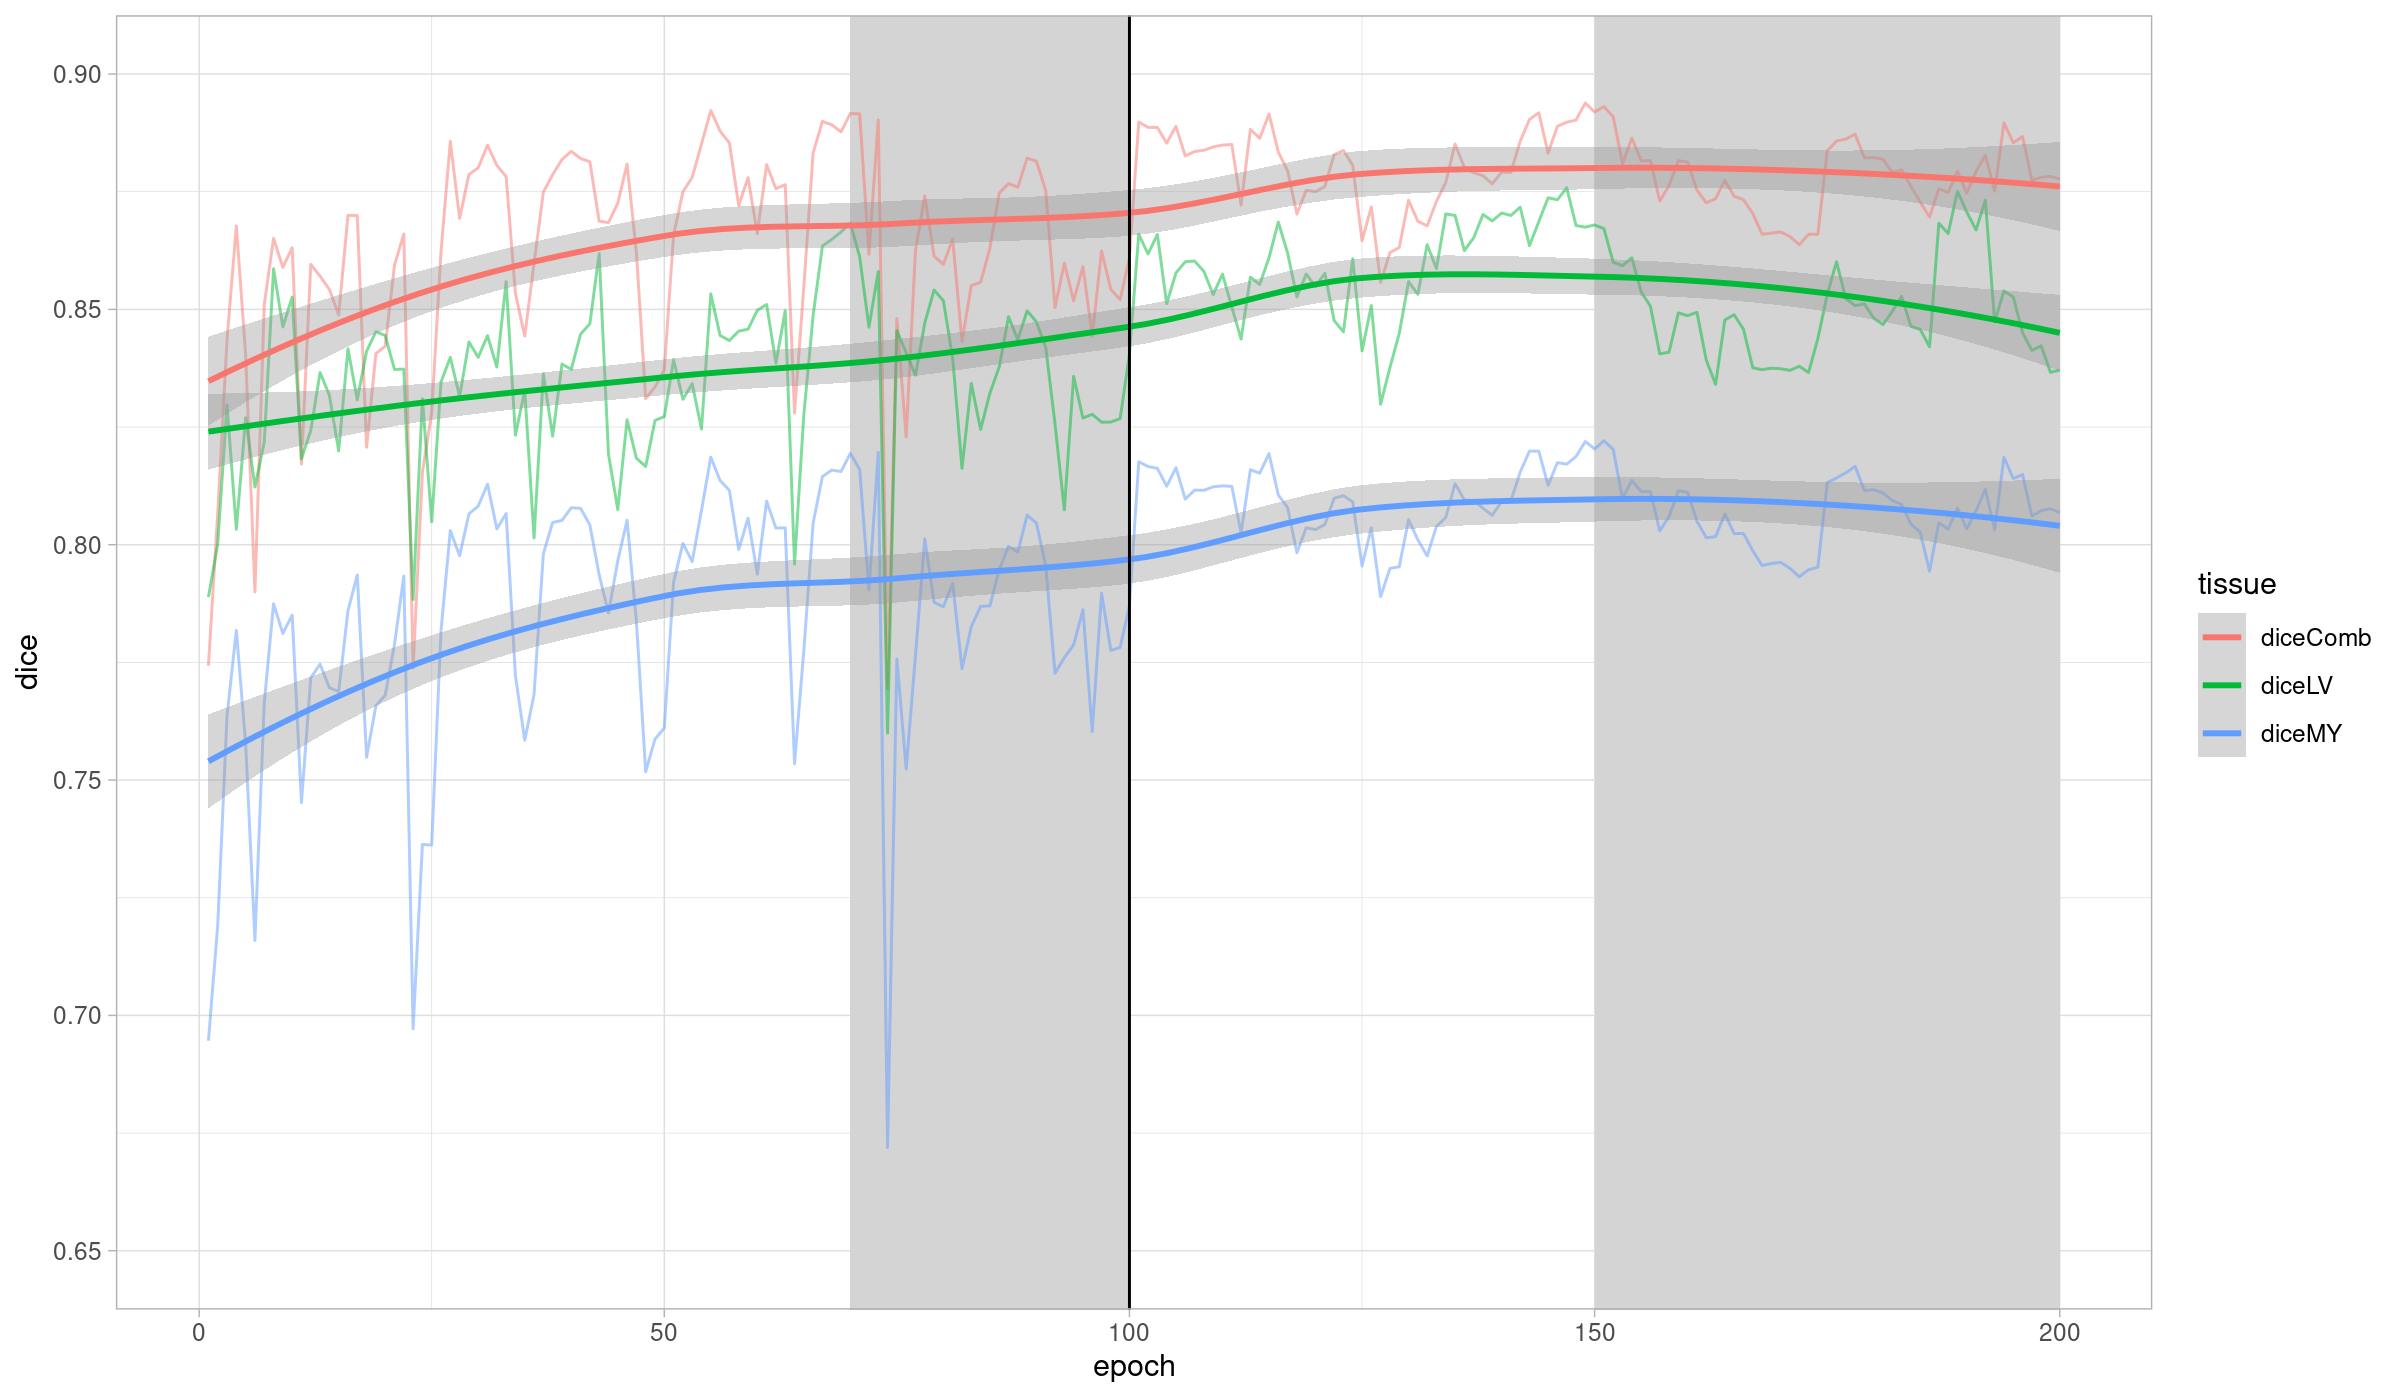

In [72]:
log_for_final_model %>%
    pivot_longer(names_to="tissue",values_to="dice",starts_with("dice")) %>%
    ggplot(aes(epoch, dice, color=tissue)) +
        geom_rect(xmin=70, xmax=100, ymin=0, ymax=1, inherit.aes = FALSE, fill="lightgrey", alpha=.01) + 
        geom_rect(xmin=150, xmax=200, ymin=0, ymax=1, inherit.aes = FALSE, fill="lightgrey", alpha=.01) + 
        geom_line(alpha=.5) +
        geom_smooth() +
        ylim(.65,.9) +
        geom_vline(xintercept = 100, col="black")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



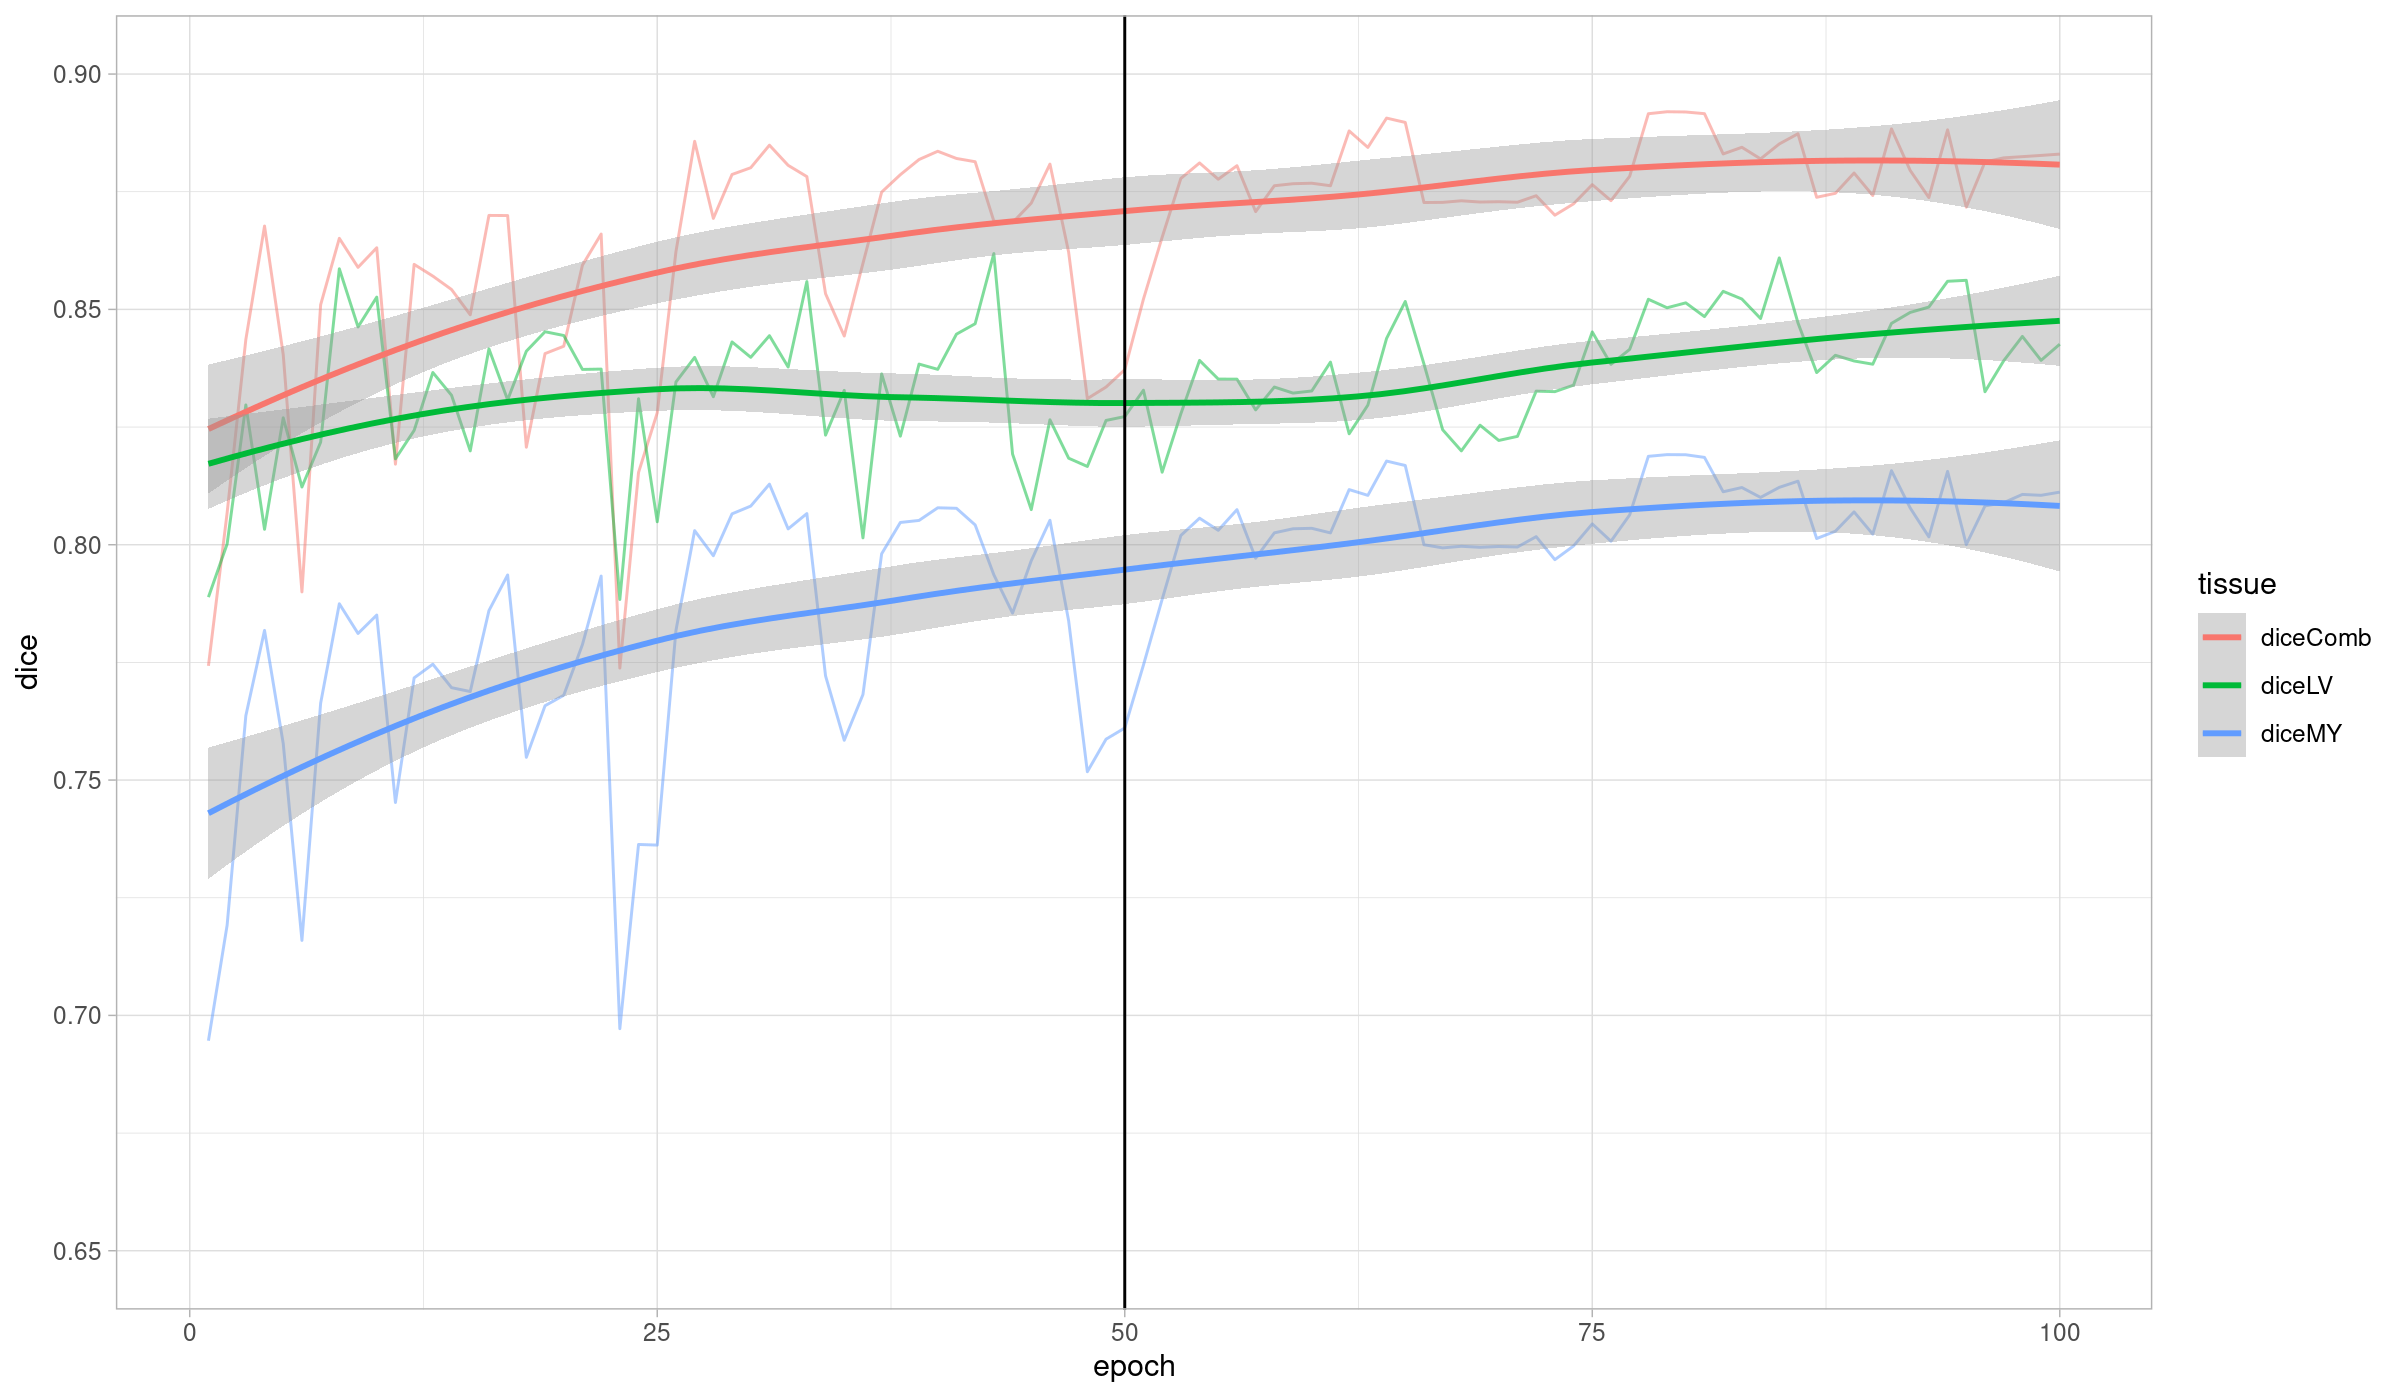

In [57]:
data %>%
    pivot_longer(names_to="tissue",values_to="dice",starts_with("dice")) %>%
    ggplot(aes(epoch, dice, color=tissue)) +
        geom_line(alpha=.5) +
        geom_smooth() +
        ylim(.65,.9) +
        geom_vline(xintercept = 50, col="black")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



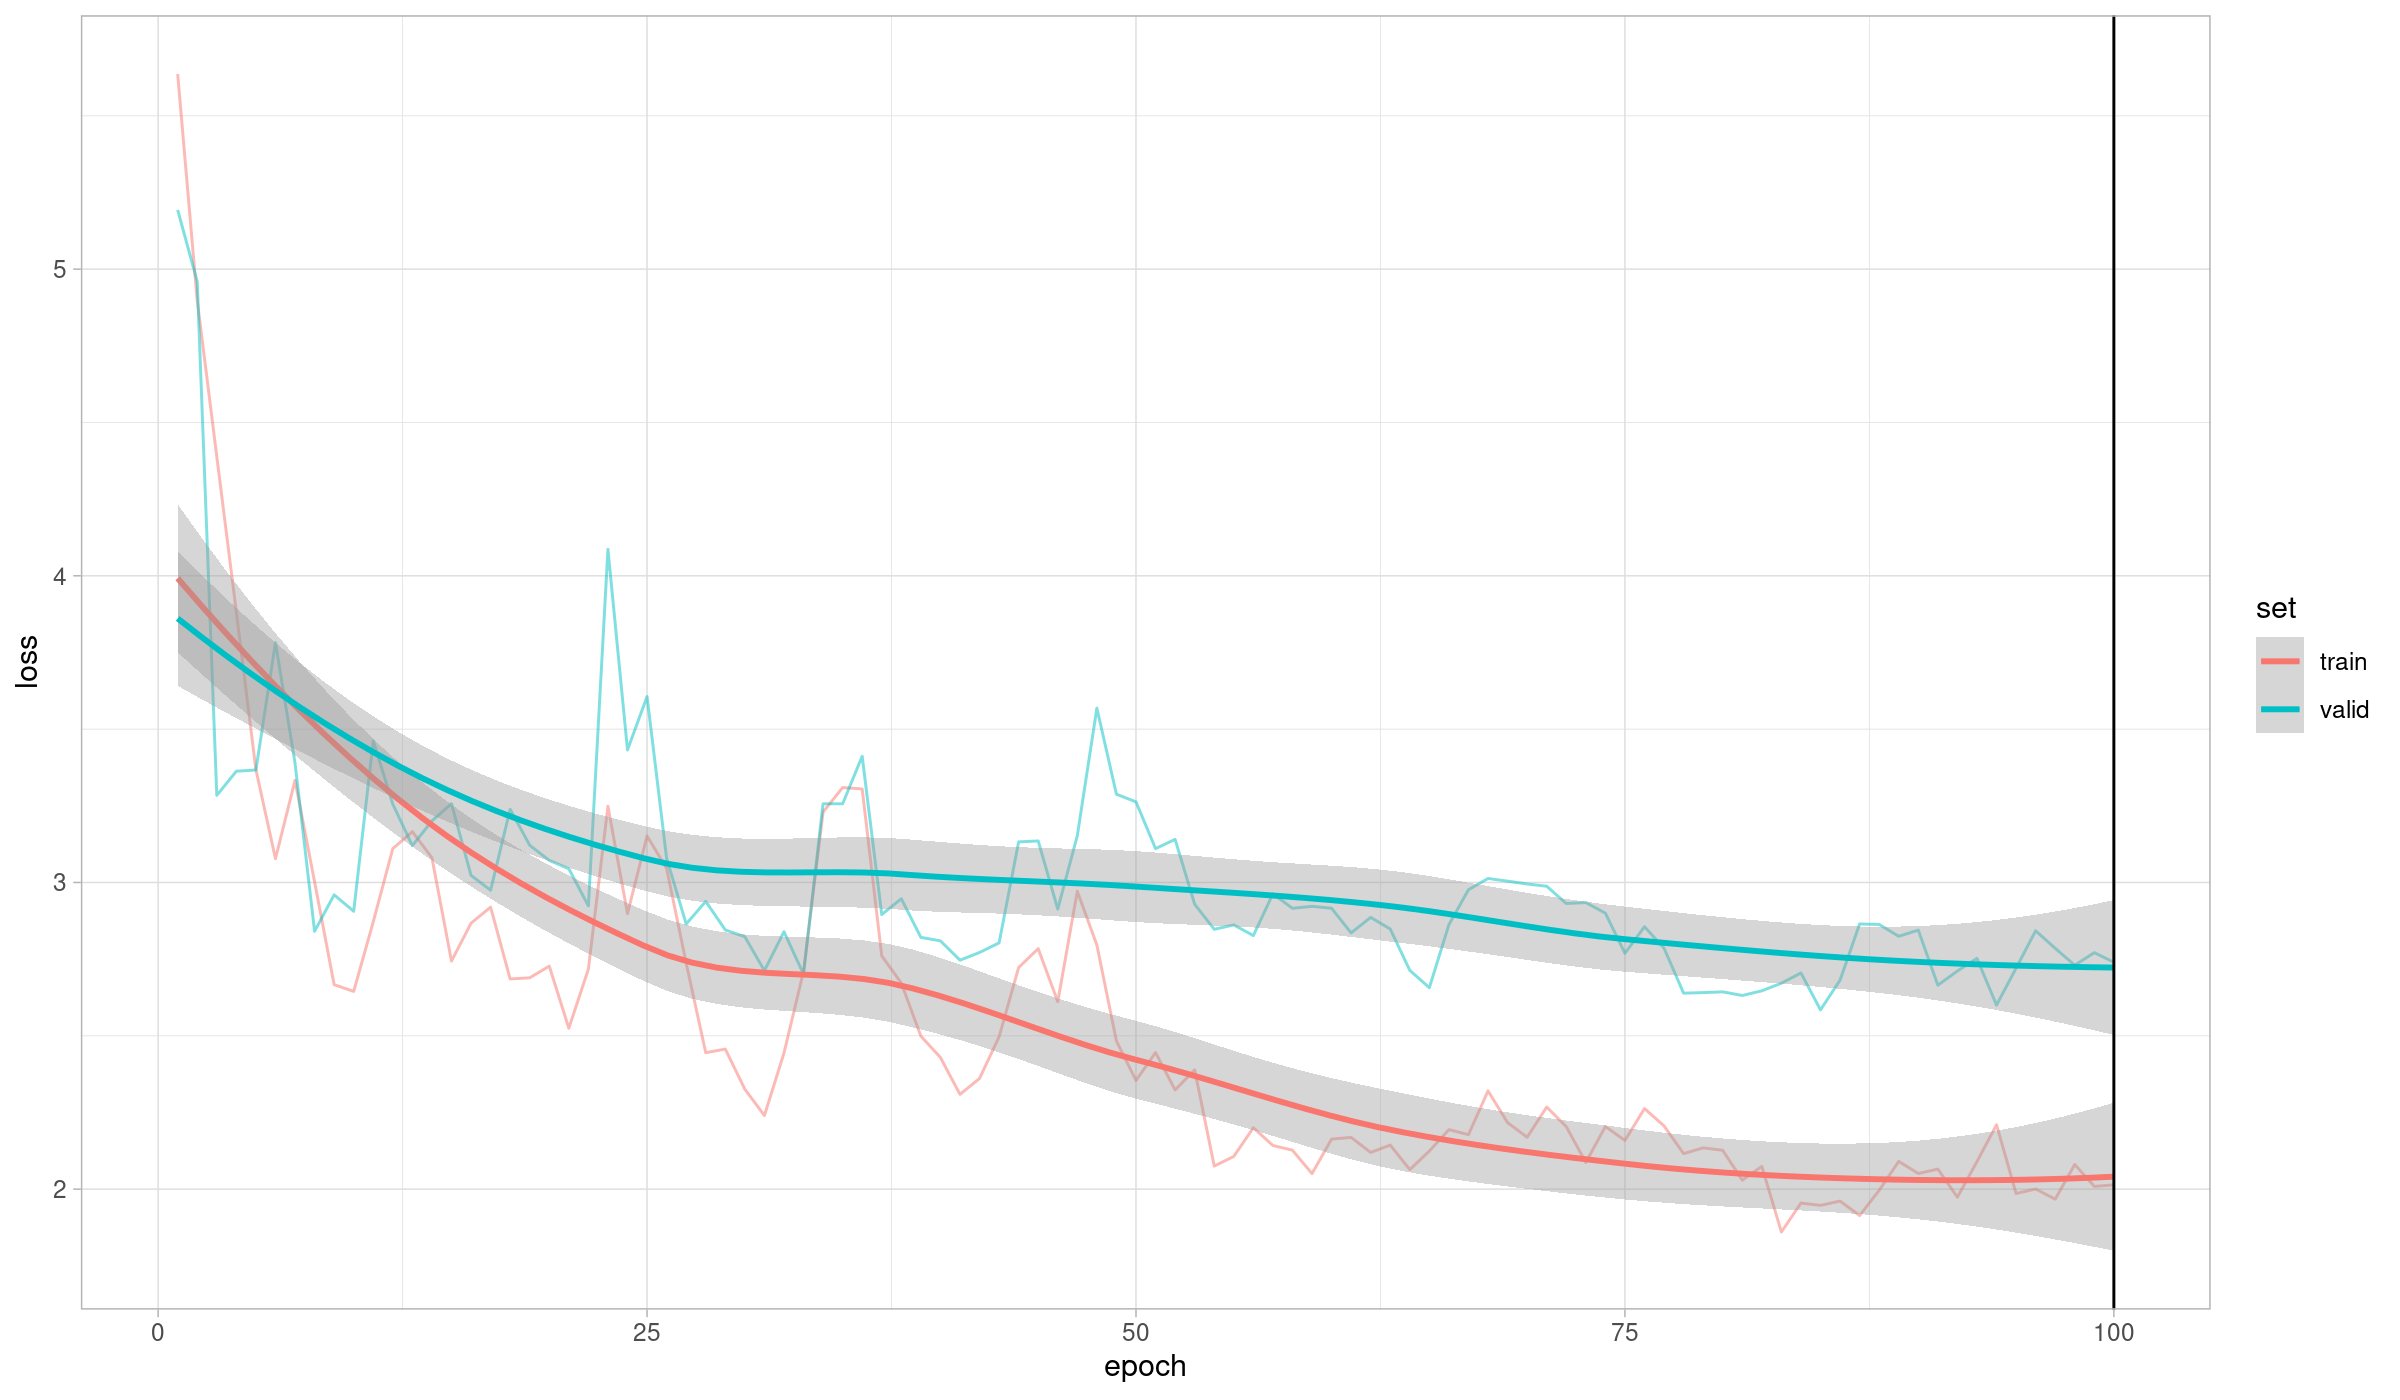

In [58]:
data %>%
    pivot_longer(names_to="set",values_to="loss",contains("loss")) %>%
    mutate(set = str_remove(set, "_loss")) %>%
    ggplot(aes(epoch, loss, color=set)) +
        geom_line(alpha=.5) +
        geom_smooth() +
        geom_vline(xintercept = 100, col="black") +
        #ylim(0,.02) +
        NULL